In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/SI699/100.zip" -d "/content"

In [ ]:
!pip install keras==2.6.0
!pip install tensorflow==2.6.0

In [4]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import os
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

In [5]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Apr 15 04:53:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


# Training Set & Testing Set

In [7]:
# Read a sample
import cv2
folder_name = '/content/100/1/'
filename = '0' + '.jpg'
img = cv2.imread(folder_name + filename, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
print(img.shape)

(100, 100, 1)


In [8]:
print(img[:, :, 0])

[[153 147 138 ... 174 175 177]
 [143 134 124 ... 175 177 178]
 [139 127 115 ... 178 179 180]
 ...
 [  9  11  14 ... 133 134 132]
 [  9  12  11 ... 133 133 132]
 [  6  12  10 ... 131 131 131]]


In [9]:
def readImages(folder_name, num):
    images = []
    count = 0
    for name in os.listdir(folder_name):
      try:
        img = cv2.imread(folder_name + name, cv2.IMREAD_GRAYSCALE).reshape(100, 100, 1)
      except:
        print(name)
      images.append(img)
      count += 1
      if count == num:
        break
    matrix = np.stack(images, axis=0)
    return matrix

In [10]:
images_0 = readImages('/content/100/0/', 5000)
images_1 = readImages('/content/100/1/', 5000)
images_2 = readImages('/content/100/2/', 5000)
images_3 = readImages('/content/100/3/', 5000)

.DS_Store


In [11]:
print(images_0.shape)
print(images_1.shape)
print(images_2.shape)
print(images_3.shape)

(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)
(5000, 100, 100, 1)


In [12]:
labels_0 = np.zeros((5000,1), int)
labels_1 = np.ones((5000,1), int)
labels_2 = np.zeros((5000,1), int)
labels_2.fill(2)
labels_3 = np.zeros((5000,1), int)
labels_3.fill(3)
print(labels_0.shape)
print(labels_1.shape)
print(labels_2.shape)
print(labels_3.shape)

(5000, 1)
(5000, 1)
(5000, 1)
(5000, 1)


In [13]:
labels = np.concatenate((labels_0, labels_1, labels_2, labels_3), axis=0)
y_train_labels = to_categorical(labels)

In [14]:
images = np.vstack((images_0, images_1, images_2, images_3))

In [15]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [17]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [18]:
print(train_images.shape)
print(y_train_labels.shape)
print(test_images.shape)
print(y_test_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(4000, 100, 100, 1)
(4000, 4)


# Validation Set

In [ ]:
!unzip "/content/drive/My Drive/SI699/Validation_100.zip" -d "/content"

In [20]:
count = 500

In [21]:
images_val_0 = readImages('/content/Validation_100/0/', count)
images_val_1 = readImages('/content/Validation_100/1/', count)
images_val_2 = readImages('/content/Validation_100/2/', count)
images_val_3 = readImages('/content/Validation_100/3/', count)

In [22]:
validation_images = np.vstack((images_val_0, images_val_1, images_val_2, images_val_3))
val_images = validation_images.astype('float32') / 255

In [23]:
labels_val_0 = np.zeros((count,1), int)
labels_val_1 = np.ones((count,1), int)
labels_val_2 = np.zeros((count,1), int)
labels_val_2.fill(2)
labels_val_3 = np.zeros((count,1), int)
labels_val_3.fill(3)
print(labels_val_0.shape)
print(labels_val_1.shape)
print(labels_val_2.shape)
print(labels_val_3.shape)

(500, 1)
(500, 1)
(500, 1)
(500, 1)


In [24]:
print(val_images.shape)

(2000, 100, 100, 1)


In [25]:
val_labels = np.concatenate((labels_val_0, labels_val_1, labels_val_2, labels_val_3), axis=0)

In [26]:
y_val_labels = to_categorical(val_labels)


In [27]:
print(train_images.shape)
print(y_train_labels.shape)
print(val_images.shape)
print(y_val_labels.shape)

(16000, 100, 100, 1)
(16000, 4)
(2000, 100, 100, 1)
(2000, 4)


# MLP

In [28]:
# MLP
mlp = models.Sequential()
mlp.add(layers.Flatten(input_shape = train_images[0].shape))
# mlp.add(Dense(64, activation = 'relu'))
# mlp.add(Dense(64, activation = 'relu'))
mlp.add(Dense(256, activation = 'relu'))
mlp.add(Dense(128, activation = 'relu'))
mlp.add(Dense(64, activation = 'relu'))
mlp.add(Dense(32, activation = 'relu'))
mlp.add(Dense(4, activation = 'softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2560256   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 2,603,620
Trainable params: 2,603,620
Non-trainable params: 0
______________________________________________

In [29]:
mlp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = mlp.fit(train_images, y_train_labels, epochs=30, verbose = True, validation_data = (val_images, y_val_labels))

Epoch 1/30
500/500 [==============================] - 5s 3ms/step - loss: 1.4223 - accuracy: 0.3058 - val_loss: 1.3163 - val_accuracy: 0.3895
Epoch 2/30
500/500 [==============================] - 1s 2ms/step - loss: 1.2922 - accuracy: 0.3773 - val_loss: 1.2426 - val_accuracy: 0.4045
Epoch 3/30
500/500 [==============================] - 1s 2ms/step - loss: 1.2490 - accuracy: 0.4083 - val_loss: 1.2011 - val_accuracy: 0.4450
Epoch 4/30
500/500 [==============================] - 1s 2ms/step - loss: 1.2343 - accuracy: 0.4198 - val_loss: 1.2616 - val_accuracy: 0.4170
Epoch 5/30
500/500 [==============================] - 1s 2ms/step - loss: 1.2154 - accuracy: 0.4377 - val_loss: 1.2250 - val_accuracy: 0.4370
Epoch 6/30
500/500 [==============================] - 1s 3ms/step - loss: 1.1885 - accuracy: 0.4543 - val_loss: 1.1782 - val_accuracy: 0.4575
Epoch 7/30
500/500 [==============================] - 1s 3ms/step - loss: 1.1851 - accuracy: 0.4583 - val_loss: 1.2116 - val_accuracy: 0.4510
Epoch 

In [30]:
predictions = mlp.predict(test_images)
predictions

array([[0.24375775, 0.4700668 , 0.12434424, 0.16183124],
       [0.28805038, 0.16605374, 0.12034012, 0.42555577],
       [0.33445784, 0.11798566, 0.35216582, 0.19539072],
       ...,
       [0.27070203, 0.28228864, 0.18784356, 0.25916576],
       [0.45157698, 0.13377121, 0.23964511, 0.1750066 ],
       [0.2475732 , 0.14313611, 0.10058354, 0.50870717]], dtype=float32)

In [36]:
test_loss, test_acc = mlp.evaluate(test_images, y_test_labels)

125/125 [==============================] - 0s 3ms/step - loss: 1.1352 - accuracy: 0.4942


In [31]:
def plotConfusionMatrix(predictions):
  y_pred=np.argmax(predictions, axis=1)
  y_test=np.argmax(y_test_labels, axis=1)

  confusion_matrix = metrics.confusion_matrix(y_pred, y_test, normalize='true')

  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Neutral", "Happy", "Sad", "Surprise"])
  disp.plot()

  plt.savefig("MLP.svg")
  plt.show()

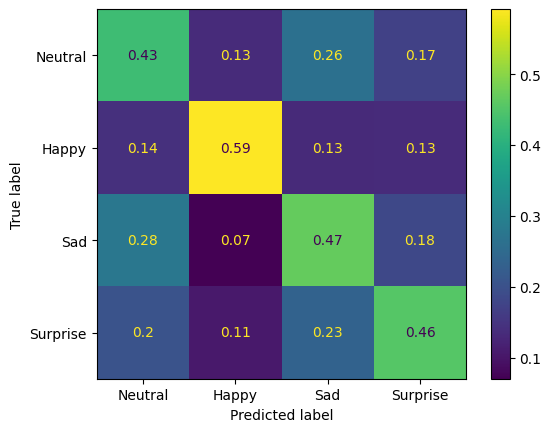

In [32]:
plotConfusionMatrix(predictions)

In [33]:
def plotAccuracyandLoss(history, name):
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{name} Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['training', 'validation'], loc='upper left')
  plt.savefig(f"{name}_acc.svg")
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


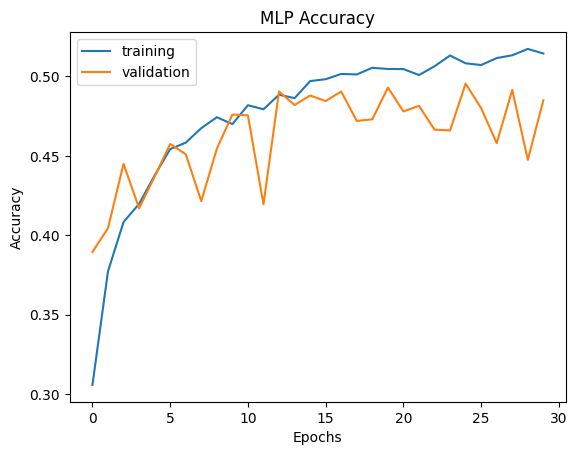

In [34]:
plotAccuracyandLoss(history, "MLP")